In this notebook I'll try to dig deeper into the data and truly understand the relation between the features and our target. Do some EDA and make a decision to keep or exclude features for a final dataset that can be used for modeling.

Let's bring in some predefined functions and use them to fill in th nulls.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#imports
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [3]:
sys.path

['/Users/lulualakdawala/Documents/DS_course/Mod_3/project/Tanzania/exploratory/ll_notebooks',
 '/opt/anaconda3/lib/python37.zip',
 '/opt/anaconda3/lib/python3.7',
 '/opt/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/opt/anaconda3/lib/python3.7/site-packages',
 '/opt/anaconda3/lib/python3.7/site-packages/aeosa',
 '/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/lulualakdawala/.ipython']

In [4]:
module_path = os.path.abspath(os.path.join(os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [5]:
sys.path.append('/Users/lulualakdawala/Documents/DS_course/Mod_3/project/Tanzania')

In [6]:
from src.data_cleaning import cleaning_functions as cfs

In [7]:
def load_data_files():
    """In this function we use the Pandas read_csv method to 
    convert the csv files in dataframes.
    
    We then split the dataframes into training and testing sets 
    
    Next we combine the X_train and y_train into one dataframe 
    
    in the end we return the X_train, X_test, y_train, y_test and merged dataframe"""
    
    #read csvs
    import pandas as pd
    features = pd.read_csv('../../data/training_set_values.csv')
    labels = pd.read_csv('../../data/training_set_labels.csv')
    
    #train and test split, random_state of 2020, test_size = 25%
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=2020, test_size=0.25)
    
    #combine X_train and y_train on common ids
    df = pd.merge(y_train, X_train) 
    
    return X_train, X_test, y_train, y_test, df
    

In [8]:
X_train, X_test, y_train, y_test, df = cfs.load_data_files()

In [9]:
cfs.fill_all_nans(df)

In [10]:
df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,41434,functional,0.0,2011-07-18,P,0,P,33.037555,-2.411289,Kwa Lutenganija Buluba,...,monthly,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
1,47577,functional,1200.0,2013-01-21,Government Of Tanzania,1228,DWE,30.254171,-4.530045,Kwa Fulugence,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
2,55982,functional,0.0,2012-10-07,Tasaf,0,DWE,31.515446,-3.335620,Kanyemba,...,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
3,25879,non functional,0.0,2013-02-20,World Vision,954,World vision,36.838153,-3.650579,Shuleni,...,unknown,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,other,other
4,13900,functional,0.0,2011-07-27,unknown,0,unknown,33.540494,-9.162976,Kwa Andreas,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44550 entries, 0 to 44549
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44550 non-null  int64  
 1   status_group           44550 non-null  object 
 2   amount_tsh             44550 non-null  float64
 3   date_recorded          44550 non-null  object 
 4   funder                 44550 non-null  object 
 5   gps_height             44550 non-null  int64  
 6   installer              44550 non-null  object 
 7   longitude              44550 non-null  float64
 8   latitude               44550 non-null  float64
 9   wpt_name               44550 non-null  object 
 10  num_private            44550 non-null  int64  
 11  basin                  44550 non-null  object 
 12  subvillage             44550 non-null  object 
 13  region                 44550 non-null  object 
 14  region_code            44550 non-null  int64  
 15  di

In [12]:
column_names = list(df.columns)
for x in ['id', 'amount_tsh', 'date_recorded', 'population']:
    column_names.remove(x)
for name in column_names:
    print('Unique values for ' +name.upper()+ ' :', df[name].unique())

Unique values for STATUS_GROUP : ['functional' 'non functional' 'functional needs repair']
Unique values for FUNDER : ['P' 'Government Of Tanzania' 'Tasaf' ... 'Sumo' 'Stabex'
 'Answeer Muslim Grou']
Unique values for GPS_HEIGHT : [   0 1228  954 ...  -55 2114 2379]
Unique values for INSTALLER : ['P' 'DWE' 'World vision' ... 'SUMO' 'STABEX' 'Biore']
Unique values for LONGITUDE : [33.03755475 30.25417082 31.5154462  ... 32.94092026 35.00990478
 34.21427694]
Unique values for LATITUDE : [ -2.41128938  -4.53004463  -3.33561986 ...  -9.1663747  -10.93883424
  -8.71236151]
Unique values for WPT_NAME : ['Kwa Lutenganija Buluba' 'Kwa Fulugence' 'Kanyemba' ... 'Atson Kibona'
 'Kwa Mzee Kilili' 'Kwa Mzee Mwangela']
Unique values for NUM_PRIVATE : [   0   12    5   11    7  102  111    1    6    8   80   45   41  150
   22   24   65   32   47   93   15   30   26  120   23   87    3   20
  160   38   34   39   50   62    4   25    2   60   16   17   55  698
   94  450  136  141    9  213   10  13

Straight away we can drop a few of these columns that won't really help us with our classification model, such as `id` `date_recorded` `recorded_by` `wpt_name` `scheme_name` `num_private`

In [13]:
df.drop(['id', 'date_recorded', 'recorded_by', 'wpt_name', 'scheme_name', 'num_private'], axis=1, inplace=True )

Noticed many similar/duplicate columns relating to similar information about each waterpoint. We'll explore each of these groups inidividually and see which of those columns have the strongest relation with the target. We'll then be able to reduce a few more columns and make the data set a bit more managable.

The groups discovered are:
* Region specific: `subvillage`, `region`, `region_code`, `district_code`, `lga`, `ward`
* Extraction specific: `extraction_type`, `extraction_type_group`, `extraction_type_class`
* Management specific: `management`, `management_group`
* Payment specific: `payment`, `payment_type`
* Water quality: `water_quality`, `quality_group`
* Water quantity: `quantity`, `quantity_group`
* Source: `source`, `source_type`, `source_class`
* Waterpoint type: `waterpoint_type`, `waterpoint_type_group`

Let's explore each of the above groups with the target as well as all the other numeric columns correlation with the target. 

First we'll use `LabelEncoder` from scikit-learn and convert our status_group to classes: 0, 1,  2

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(df['status_group'])
le.classes_

array(['functional', 'functional needs repair', 'non functional'],
      dtype=object)

In [15]:
{k:v for k,v in zip(
    le.transform(['functional', 'functional needs repair', 'non functional']), 
                        ['functional', 'functional needs repair', 'non functional'])}

{0: 'functional', 1: 'functional needs repair', 2: 'non functional'}

 #### 0 : Functional
 #### 1 : Functional needs Repair
 #### 2 : Non Functional

In [16]:
target = pd.DataFrame(target, columns=['target'])
df = pd.concat([target, df], axis=1)
df.drop('status_group', axis=1, inplace=True)

In [17]:
df.target.value_counts(normalize=True)

0    0.544310
2    0.384646
1    0.071044
Name: target, dtype: float64

#### Class imbalance 
only **7% of data** relates to **class 1** (waterpoints that are functional and need repair)

Need to figure out if something can be done about this.

#### Examining numerical features with target

In [18]:
df.corr()

,target,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year
target,1.000000,-0.054185,-0.110900,0.004049,-0.013182,0.108549,0.065173,-0.016510,-0.040287
amount_tsh,-0.054185,1.000000,0.079468,0.022313,-0.054662,-0.026169,-0.022900,0.018140,0.071840
gps_height,-0.110900,0.079468,1.000000,0.150513,-0.039678,-0.183942,-0.170469,0.137938,0.658323
longitude,0.004049,0.022313,0.150513,1.000000,-0.426650,0.035392,0.151981,0.087481,0.396180
latitude,-0.013182,-0.054662,-0.039678,-0.426650,1.000000,-0.221412,-0.203566,-0.022646,-0.247621
region_code,0.108549,-0.026169,-0.183942,0.035392,-0.221412,1.000000,0.679503,0.094390,0.033676
district_code,0.065173,-0.022900,-0.170469,0.151981,-0.203566,0.679503,1.000000,0.064433,0.051457
population,-0.016510,0.018140,0.137938,0.087481,-0.022646,0.094390,0.064433,1.000000,0.267460
construction_year,-0.040287,0.071840,0.658323,0.396180,-0.247621,0.033676,0.051457,0.267460,1.000000


In [19]:
df.corr()['target'].sort_values(ascending=False)

target               1.000000
region_code          0.108549
district_code        0.065173
longitude            0.004049
latitude            -0.013182
population          -0.016510
construction_year   -0.040287
amount_tsh          -0.054185
gps_height          -0.110900
Name: target, dtype: float64

Don't notice any strong correlations with the target. Relatively strongest correlations are exhibited by `gps_height`, `region_code`, `district_code`, `amount_tsh`, `construction_year`

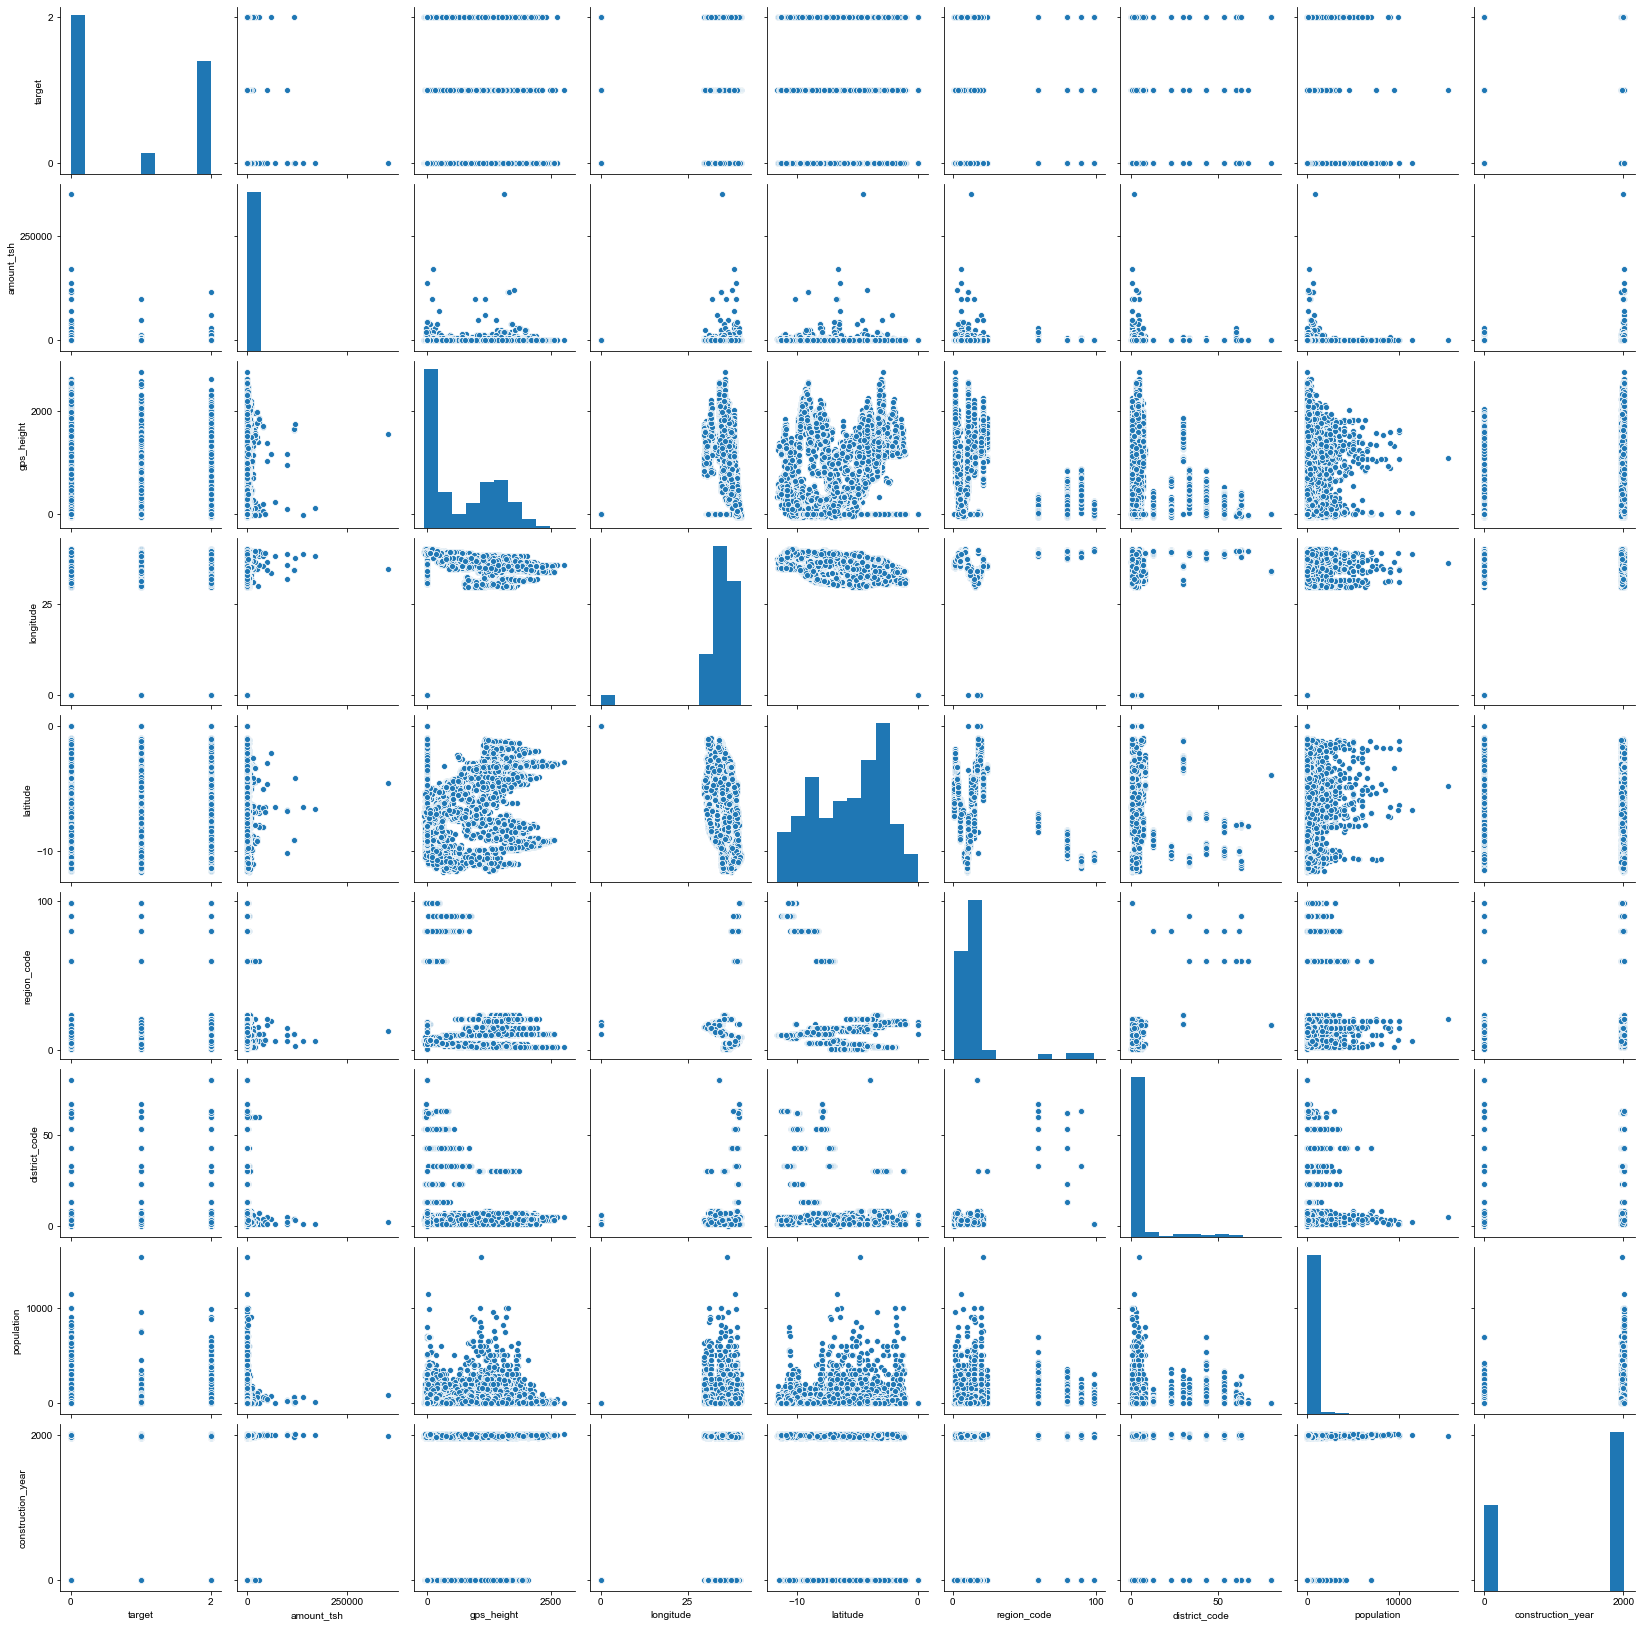

In [20]:
sns.pairplot(df)
sns.set(font_scale = 3)
plt.show();

#### Now lets explore those groups with the target

#### First up ####  
**Region specific:** `subvillage`, `basin`, `region`, `region_code`, `district_code`, `lga`, `ward`

In [21]:
sub_df_region = df.loc[:, ['target', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward']]
sub_df_region

,target,basin,subvillage,region,region_code,district_code,lga,ward
0,0,Lake Victoria,1,Mwanza,19,8,Ilemela,Nyakato
1,0,Lake Tanganyika,Gwiru,Kigoma,16,2,Kasulu,Ruhita
2,0,Lake Tanganyika,Buganzu,Shinyanga,17,5,Bukombe,Uyovu
3,2,Pangani,Shuleni,Manyara,21,4,Simanjiro,Shambarai
4,0,Lake Nyasa,Ilongovoto,Mbeya,12,4,Rungwe,Kiwira
...,...,...,...,...,...,...,...,...
44545,1,Lake Rukwa,Lusembo,Rukwa,15,3,Nkasi,Kipande
44546,2,Lake Rukwa,Tukuma,Rukwa,15,2,Sumbawanga Rural,Mpui
44547,0,Lake Rukwa,Kilimampimbi,Mbeya,12,6,Mbozi,Isandula
44548,0,Lake Nyasa,Jimboni,Ruvuma,10,3,Mbinga,Mbinga Urban


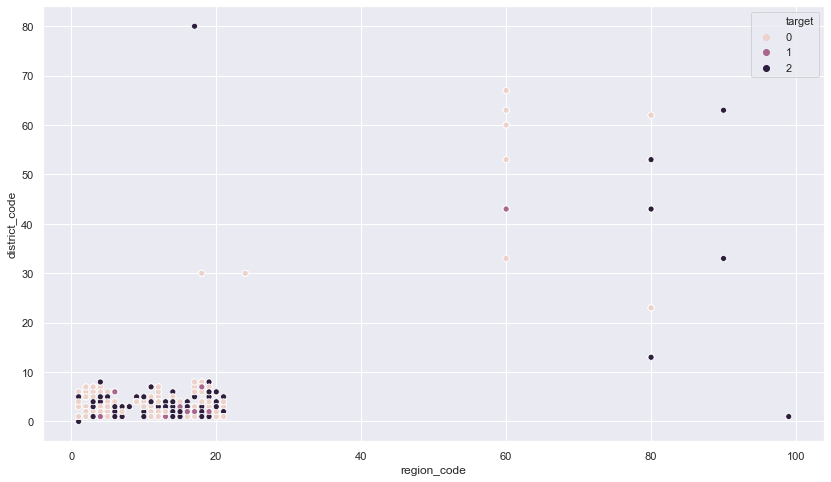

In [45]:
plt.figure(figsize=(14,8))
sns.scatterplot(df.region_code, df.district_code, hue=df.target)
sns.set(font_scale=1);

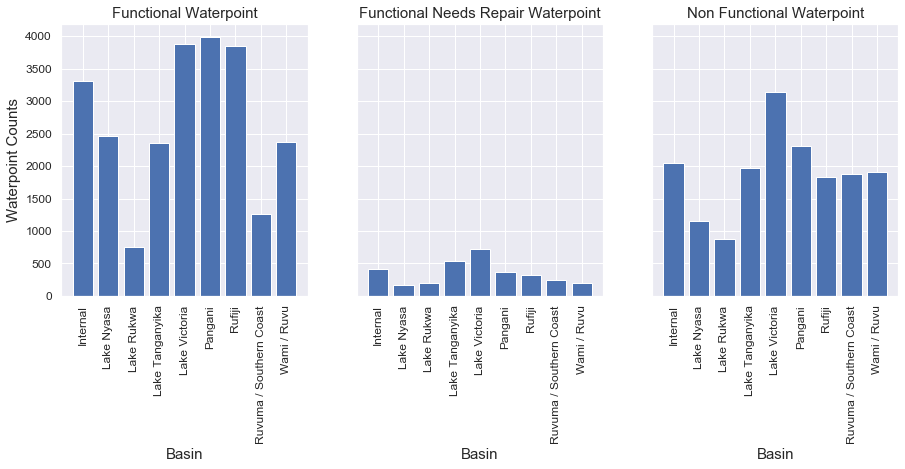

In [23]:
f, axs = plt.subplots(1,3, figsize=(15,5), sharey=True)
df_sub_basin = df.loc[:, ['target', 'basin']]
for i in [0,1,2]:
    #collecting counts for each basin with regards to each class(0,1,2)
    counts = df_sub_basin[df_sub_basin['target'] == i].basin.value_counts()
    counts = list(zip(counts.index, counts.values))
    
    #sorting basins alphabetically
    sorted_counts = sorted(counts, key=lambda x: x[0])
    keys, values = zip(*sorted_counts)
    ax = axs[i]
    
    #plotting the counts
    ax.bar(keys, values)
    
    #to make it easier to see all labels
    ax.tick_params(axis='x', labelrotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.set_xlabel('Basin', fontsize=15)
    ax.set_ylabel('Waterpoint Counts', fontsize=15)
    #to on see labels on the outer y axis
    ax.label_outer()

    
#settin titles     
names = ['Functional', 'Functional Needs Repair', 'Non Functional']
    
for i,j in enumerate(names):
    ax = axs[i]
    ax.set_title(j + ' Waterpoint', fontsize=15)
    
plt.show();

Based on the distribution of the waterpoints count with regards to the different basins and their funtionality there seems to be a pattern where some basins have more functional waterpoints versus nonfunctional or requiring repair. This could be an important feature to keep in the model.

*Note to self: figure out how to plot these 3 graphs in one*

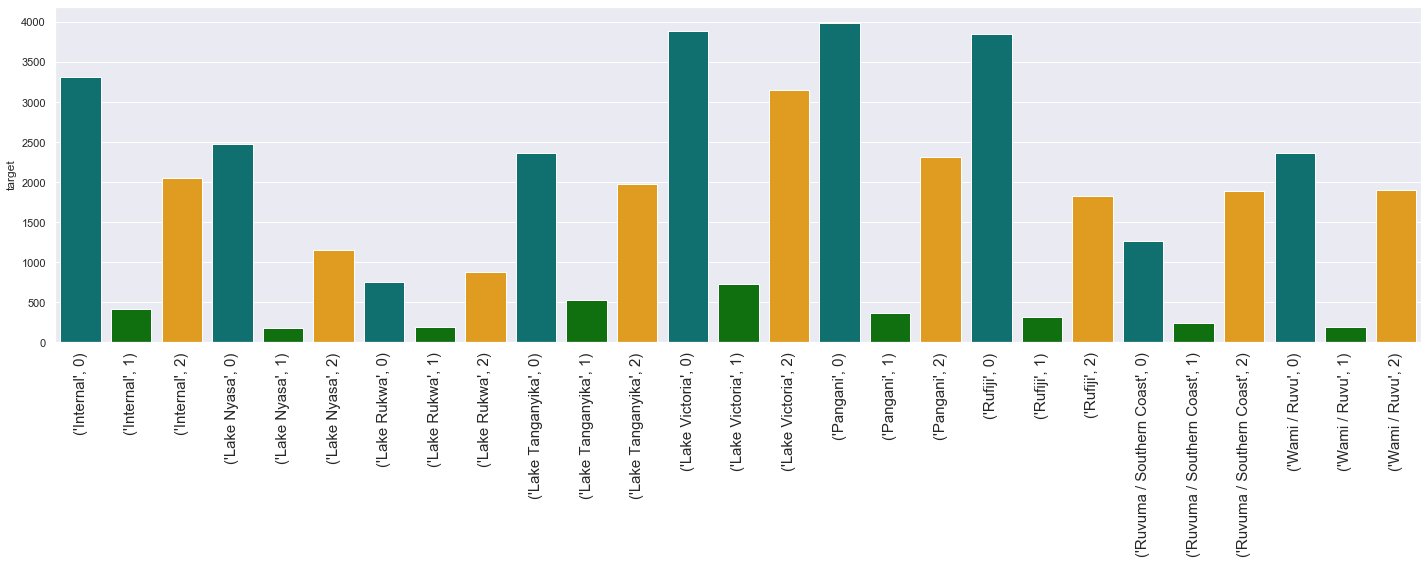

In [24]:
basin_count = df.groupby('basin').target.value_counts(sort=False)

plt.figure(figsize=(20,8))
sns.barplot(x=basin_count.index, y=basin_count, palette=['teal', 'green', 'orange'])
plt.tick_params(axis='x', labelrotation=90, labelsize=15)
plt.tight_layout()
plt.show()

Let's bring in OneHotencoder and convert all the region specfic columns to visualize their relation with target

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
sub_df_basin = df.loc[:, ['target', 'basin']]
ohe = OneHotEncoder(categories='auto', handle_unknown='ignore')
single_feature_df = sub_df_basin[['basin']]
ohe.fit(single_feature_df)
feature_array = ohe.transform(single_feature_df).toarray()
ohe_df = pd.DataFrame(feature_array, columns=ohe.categories_[0], index=sub_df_basin.index)
sub_df_basin = sub_df_basin.drop('basin', axis=1)
sub_df_basin = pd.concat([sub_df_basin, ohe_df], axis=1)

sub_df_basin

,target,Internal,Lake Nyasa,Lake Rukwa,Lake Tanganyika,Lake Victoria,Pangani,Rufiji,Ruvuma / Southern Coast,Wami / Ruvu
0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
44545,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
44546,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
44547,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
44548,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
sub_df_basin.corr().target.sort_values()

Rufiji                    -0.073629
Lake Nyasa                -0.059840
Pangani                   -0.040788
Internal                  -0.023854
Wami / Ruvu                0.019762
Lake Tanganyika            0.029663
Lake Victoria              0.031087
Lake Rukwa                 0.050057
Ruvuma / Southern Coast    0.103784
target                     1.000000
Name: target, dtype: float64

18808 columns is insane! we need to trim these NOW

In [28]:
def find_corr_for_category(name, df=df):
    """This function takes in categorical feature name and
    Onehot incodes it and spits out a corrwelation with the classes
    Reminder: {0: 'functional', 1: 'functional needs repair', 2: 'non functional'}
    So if there's a high positive correlation then that would mean that the higher the 
    feature impacts non-functional waterpoints and if there's high negative correlation
    then the feature impacts functional waterpoints
    """
    
    sub_df = df.loc[:, ['target', name]]
    ohe = OneHotEncoder(categories='auto', handle_unknown='ignore')
    single_feature_df = sub_df[[name]]
    ohe.fit(single_feature_df)
    feature_array = ohe.transform(single_feature_df).toarray()
    ohe_df = pd.DataFrame(feature_array, columns=ohe.categories_[0], index=sub_df.index)
    sub_df = sub_df.drop(name, axis=1)
    sub_df = pd.concat([sub_df, ohe_df], axis=1)
    correlation = sub_df.corr().target.sort_values()
    return correlation

In [29]:
find_corr_for_category('region')

Iringa          -0.142497
Arusha          -0.067792
Kilimanjaro     -0.030899
Shinyanga       -0.026859
Manyara         -0.025395
Pwani           -0.009883
Kigoma          -0.005765
Ruvuma          -0.002454
Tanga           -0.002063
Dar es Salaam    0.001646
Kagera           0.004581
Morogoro         0.005195
Mbeya            0.012369
Singida          0.026768
Dodoma           0.028410
Mwanza           0.030007
Mara             0.046816
Tabora           0.053572
Rukwa            0.060967
Lindi            0.084659
Mtwara           0.090425
target           1.000000
Name: target, dtype: float64

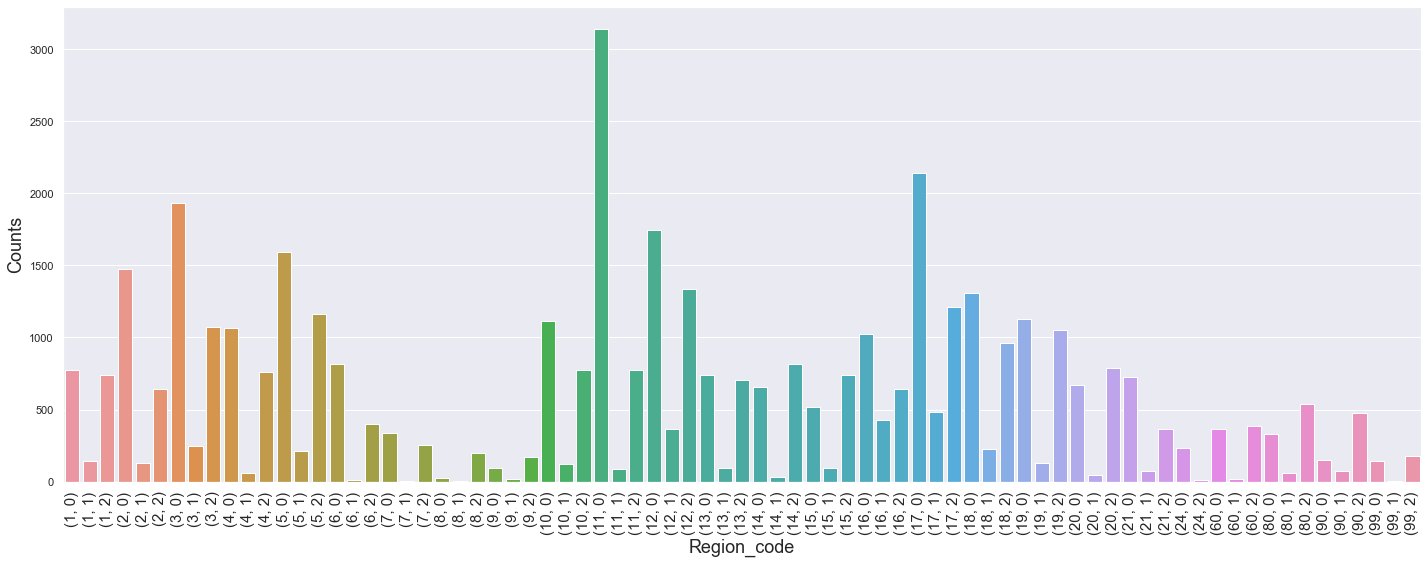

In [30]:
def plot_relation_with_target(name, df):
    plt.figure(figsize=(20,8))

    counts = df.groupby([name]).target.value_counts(sort=False)

    sns.barplot(x=counts.index, y=counts)
    plt.tick_params(axis='x', labelrotation=90, labelsize=15)
    plt.xlabel(name.capitalize(), fontsize=18)
    plt.ylabel('Counts', fontsize=18)
    plt.tight_layout()
    return plt.show()

plot_relation_with_target('region_code', df)

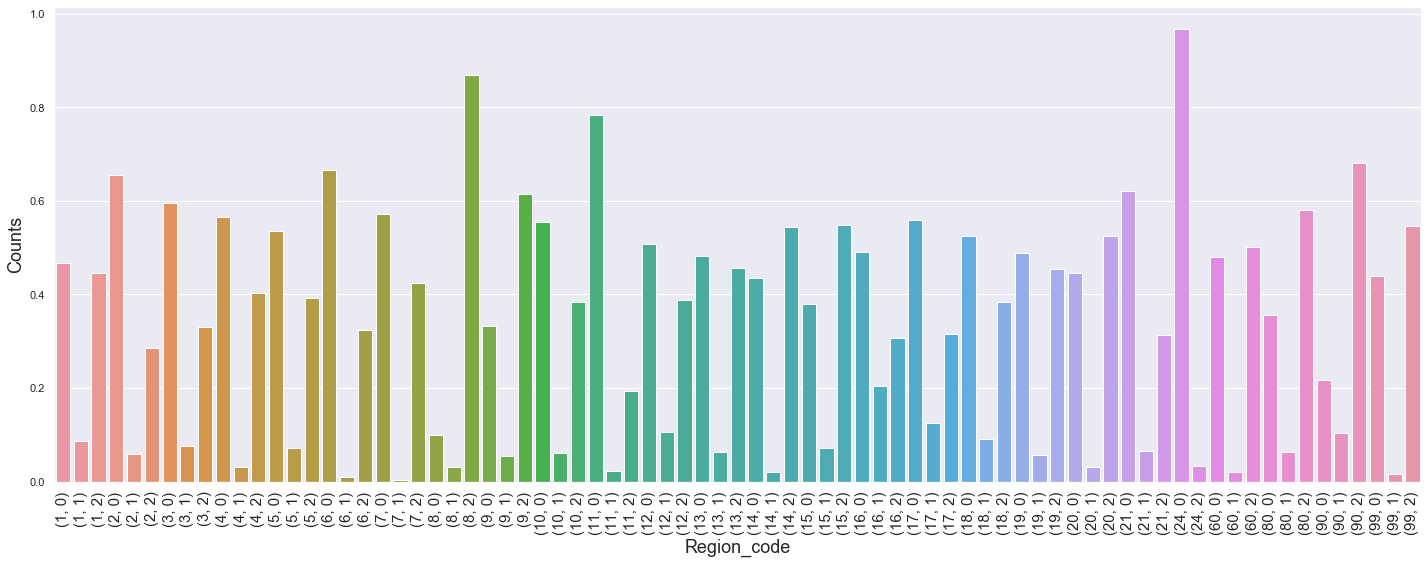

In [31]:
def plot_relation_with_target_normalized(name, df):
    plt.figure(figsize=(20,8))

    counts = df.groupby([name]).target.value_counts(sort=False, normalize=True)

    sns.barplot(x=counts.index, y=counts)
    plt.tick_params(axis='x', labelrotation=90, labelsize=15)
    plt.xlabel(name.capitalize(), fontsize=18)
    plt.ylabel('Counts', fontsize=18)
    plt.tight_layout()
    return plt.show()

plot_relation_with_target_normalized('region_code', df)

Can't decide between `region` and `region_code`yet, will keep them both for now

Looking at Subvillage....

In [32]:
df.groupby(['subvillage']).target.value_counts(sort=False)

subvillage   target
'A' Kati     2           1
1            0          38
             1           7
             2          54
14Kambalage  0           4
                      ... 
Zunzuli      0           1
             2           1
unknown      0         164
             1           1
             2         123
Name: target, Length: 21416, dtype: int64

In [33]:
len(df.subvillage.unique())

16579

One hot encoding those many unique values, we'll end up adding 16,579 columns, any advanced classification model will end up taking too long to run. Might be best to drop this column since we have enough geographical specific columns that we can include in our model. Dropping Subvillage then!

In [34]:
df.drop('subvillage', axis=1, inplace=True)

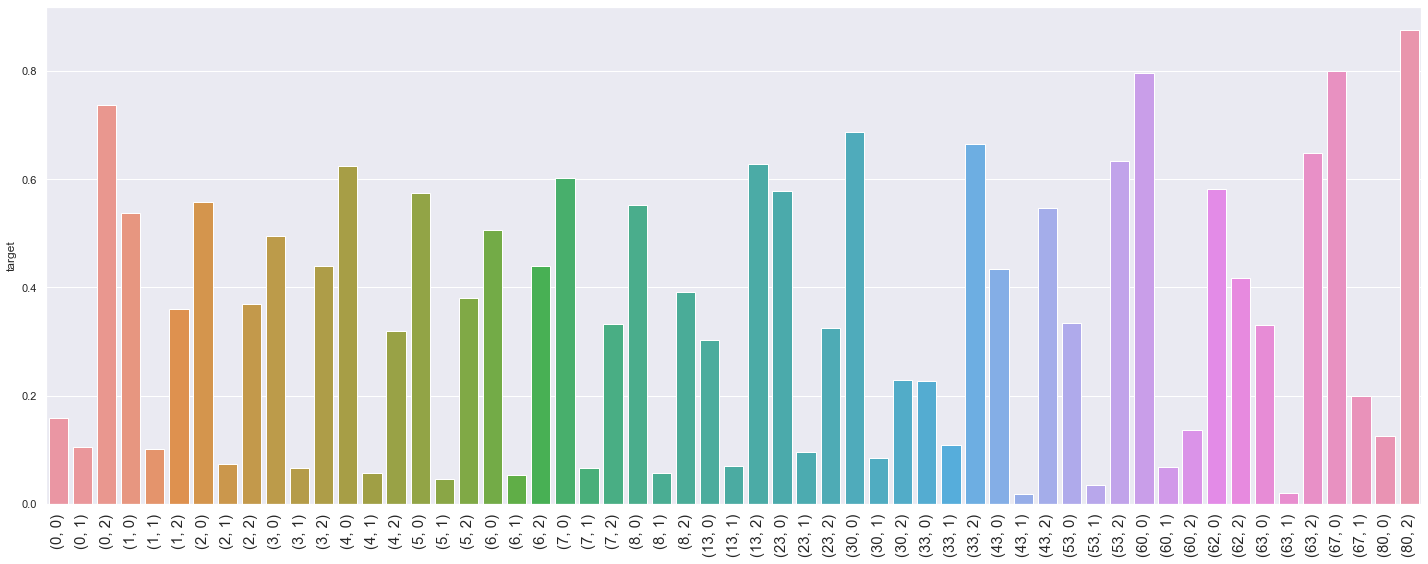

In [35]:
dist_code_count = df.groupby('district_code').target.value_counts(sort=False, normalize=True)

plt.figure(figsize=(20,8))
sns.barplot(x=dist_code_count.index, y=dist_code_count)
plt.tick_params(axis='x', labelrotation=90, labelsize=15)
plt.tight_layout()
plt.show()

Looking into the `lga` and `ward` features

In [36]:
lga_dist = df.groupby('lga').target.value_counts(sort=False, normalize=True)

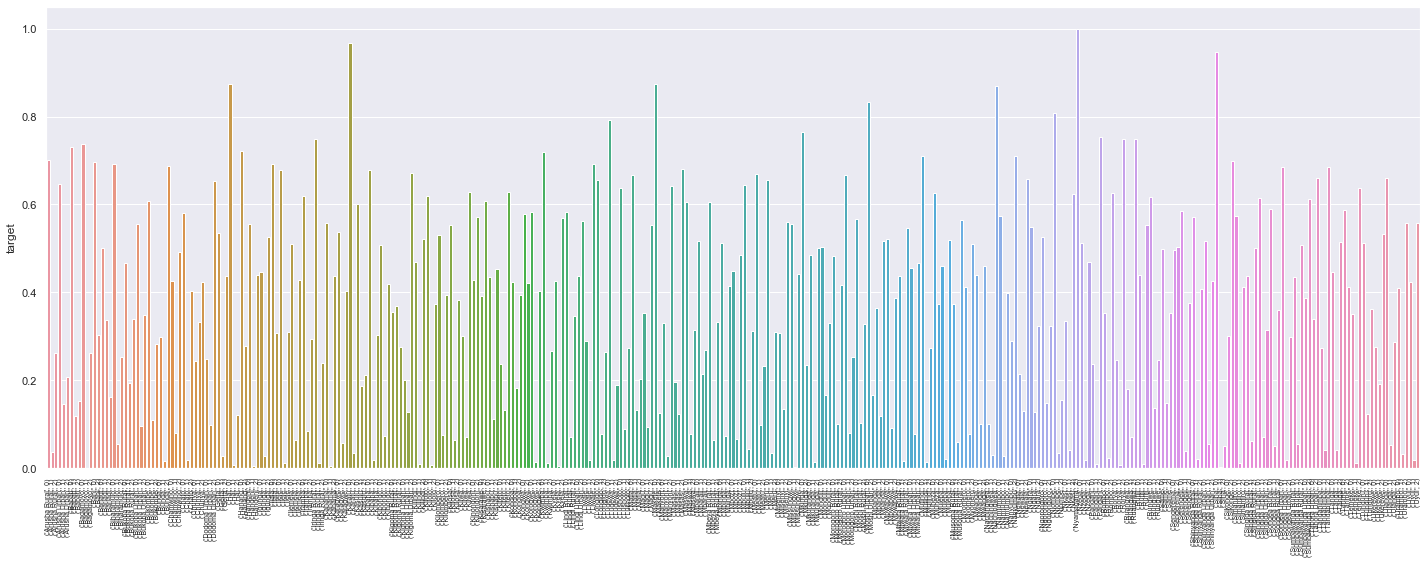

In [37]:
plt.figure(figsize=(20,8))
sns.barplot(x=lga_dist.index, y=lga_dist)
plt.tick_params(axis='x', labelrotation=90, labelsize=7)
plt.tight_layout()
plt.show()

In [38]:
len(df.lga.unique())

125

125 unique `lga` categories again can make modeling slow and tough, but its still not in the thousands. Keeping it for now, can look at some model performances before dropping it out completely.

In [39]:
find_corr_for_category('lga')

Njombe       -0.109273
Siha         -0.065438
Hai          -0.064203
Makete       -0.064143
Karatu       -0.059757
                ...   
Pangani       0.050396
Ruangwa       0.055072
Masasi        0.064386
Nachingwea    0.070196
target        1.000000
Name: target, Length: 126, dtype: float64

In [40]:
len(df.ward.unique())

2071

now that's tooo many

In [41]:
df.groupby('ward').target.value_counts(sort=False, normalize=True)

ward       target
Aghondi    2         1.000000
Akheri     0         0.612903
           1         0.129032
           2         0.258065
Arash      0         0.375000
                       ...   
Zongomera  0         0.478261
           2         0.521739
Zuzu       0         0.500000
           1         0.071429
           2         0.428571
Name: target, Length: 4671, dtype: float64

Purely based on the variety/size of this categorical feature, I want to drop it since we have quite a few similar ones already in the dartaset.

In [42]:
df.drop('ward', axis=1, inplace=True)

In [43]:
df.head(7)

,target,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,region_code,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,0,0.0,P,0,P,33.037555,-2.411289,Lake Victoria,Mwanza,19,...,monthly,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
1,0,1200.0,Government Of Tanzania,1228,DWE,30.254171,-4.530045,Lake Tanganyika,Kigoma,16,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
2,0,0.0,Tasaf,0,DWE,31.515446,-3.335620,Lake Tanganyika,Shinyanga,17,...,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
3,2,0.0,World Vision,954,World vision,36.838153,-3.650579,Pangani,Manyara,21,...,unknown,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,other,other
4,0,0.0,unknown,0,unknown,33.540494,-9.162976,Lake Nyasa,Mbeya,12,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
5,2,0.0,Danida,0,Central government,33.906286,-9.422596,Lake Nyasa,Mbeya,12,...,monthly,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe
6,2,0.0,Government Of Tanzania,934,District council,37.668473,-3.318240,Pangani,Kilimanjaro,3,...,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe multiple,communal standpipe


In [44]:
df.columns

Index(['target', 'amount_tsh', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'basin', 'region', 'region_code',
       'district_code', 'lga', 'population', 'public_meeting',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

### Takeaways from this notebook

* We dropped a few features in this notebook, `id` `date_recorded` `recorded_by` `wpt_name` `scheme_name` `num_private` `subvillage` `ward`
* Saw some correlations between a few features and teh target.
* Noticed class imbalance 


#### Next Steps:


* Trim down duplicate features
* Automate the process of cleaning data
* More EDA
* Start Modeling